In [2]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\lenovo\OneDrive\Documents\final_depression_dataset_1.csv"

In [3]:
# Load the dataset
df = pd.read_csv(file_path)

In [4]:
# Display basic info
print(df.info())
print(df.head())  # Show first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [5]:
# Check missing values
print(df.isnull().sum())


Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64


In [6]:
# Drop columns with too many missing values
df.drop(columns=['Academic Pressure', 'CGPA', 'Study Satisfaction'], inplace=True)

In [7]:
# Fill numerical missing values with median (without inplace=True)
df['Work Pressure'] = df['Work Pressure'].fillna(df['Work Pressure'].median())
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(df['Job Satisfaction'].median())

In [8]:
# Fill categorical missing values with mode (without inplace=True)
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

In [9]:
# Verify if all missing values are handled
print(df.isnull().sum())  

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

# Binary Encoding (Yes/No → 0/1)
binary_cols = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [11]:
# Label Encoding for smaller categorical features
label_cols = ['Gender', 'Working Professional or Student', 'Sleep Duration', 'Dietary Habits']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
# One-Hot Encoding for larger categorical features
df = pd.get_dummies(df, columns=['City', 'Profession', 'Degree'], drop_first=True)  # Avoids multicollinearity

# Label Encoding	When the categorical variable has an order/rank (e.g., Small < Medium < Large).
#One-Hot Encoding	When the categorical variable has no inherent order (e.g., City, Country, Profession).

In [13]:
# Check dataset after encoding
print(df.head())  

      Name  Gender  Age  Working Professional or Student  Work Pressure  \
0    Pooja       0   37                                1            2.0   
1  Reyansh       1   60                                1            4.0   
2    Manvi       0   42                                1            2.0   
3     Isha       0   44                                1            3.0   
4    Aarav       1   48                                1            4.0   

   Job Satisfaction  Sleep Duration  Dietary Habits  \
0               4.0               1               1   
1               3.0               0               2   
2               3.0               0               1   
3               5.0               1               0   
4               3.0               1               1   

   Have you ever had suicidal thoughts ?  Work/Study Hours  ...  \
0                                      0                 6  ...   
1                                      1                 0  ...   
2                

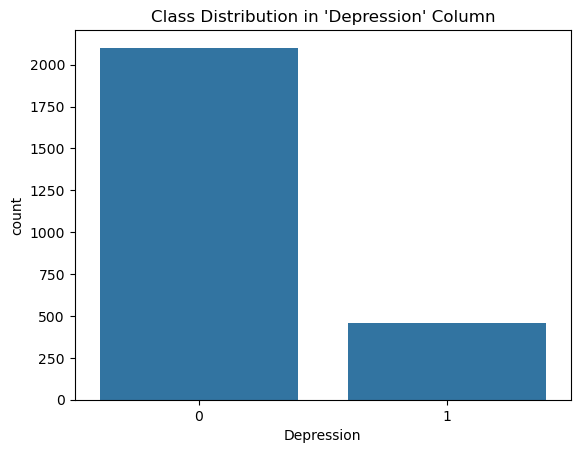

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot to visualize class imbalance
sns.countplot(x=df['Depression'])
plt.title("Class Distribution in 'Depression' Column")
plt.show()

In [15]:
# Print value counts
print(df['Depression'].value_counts())

Depression
0    2101
1     455
Name: count, dtype: int64


In [16]:
#SMOTE (Synthetic Minority Oversampling Technique) creates synthetic examples for the minority class instead of just duplicating them.
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio as needed


In [20]:
# Separate features and target
X = df.drop(columns=['Depression', 'Name'])
y = df['Depression']

In [21]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

c:\Users\lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\lenovo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lenovo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\lenovo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

In [23]:
# Convert back to DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Depression'])], axis=1)


In [24]:
# Check new class distribution
print(df_resampled['Depression'].value_counts())

Depression
0    2101
1    1050
Name: count, dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16396\525408793.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='coolwarm')


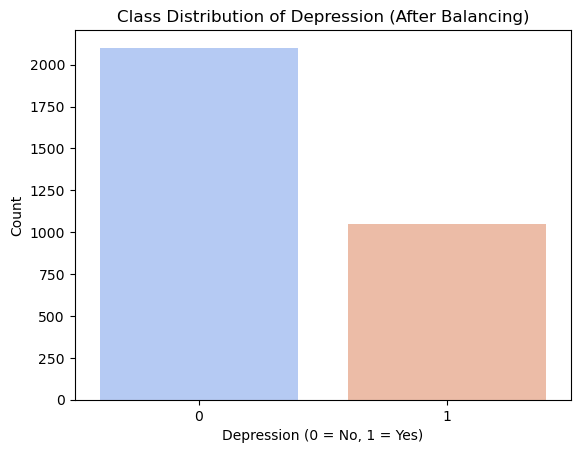

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x=y_resampled, palette='coolwarm')
plt.title("Class Distribution of Depression (After Balancing)")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

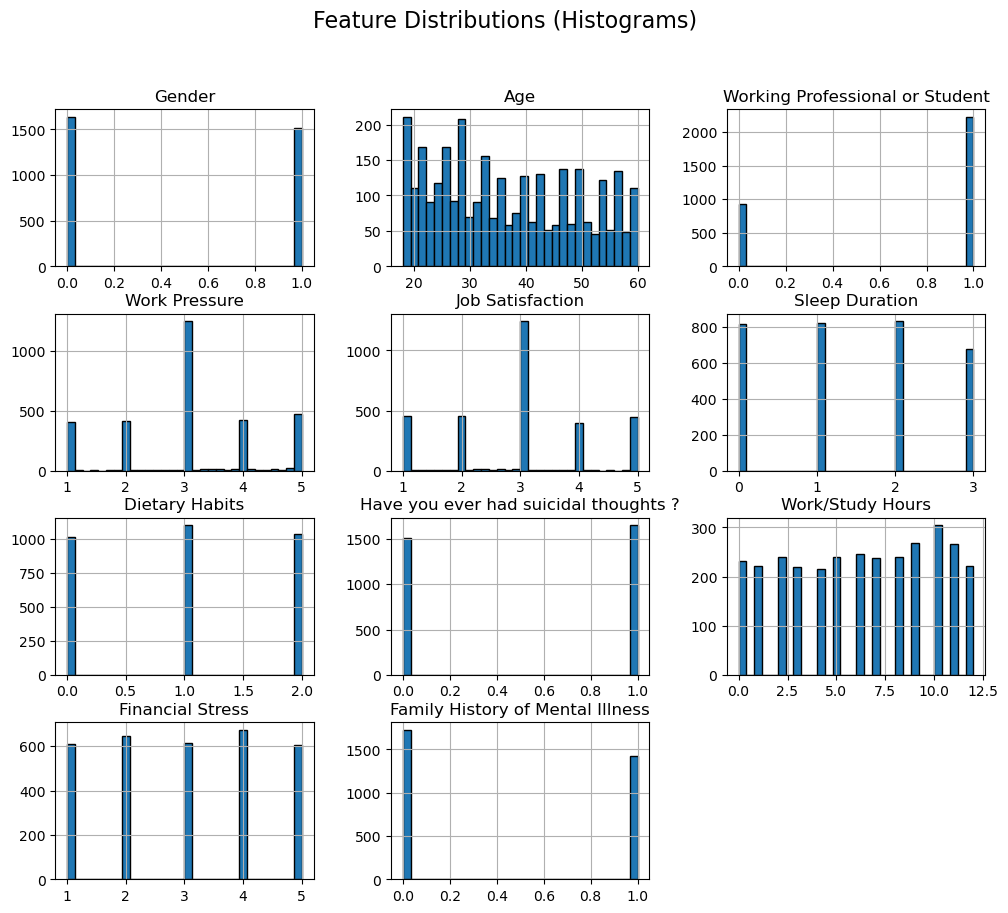

In [26]:
# Plot histograms for all numerical features
X_resampled.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

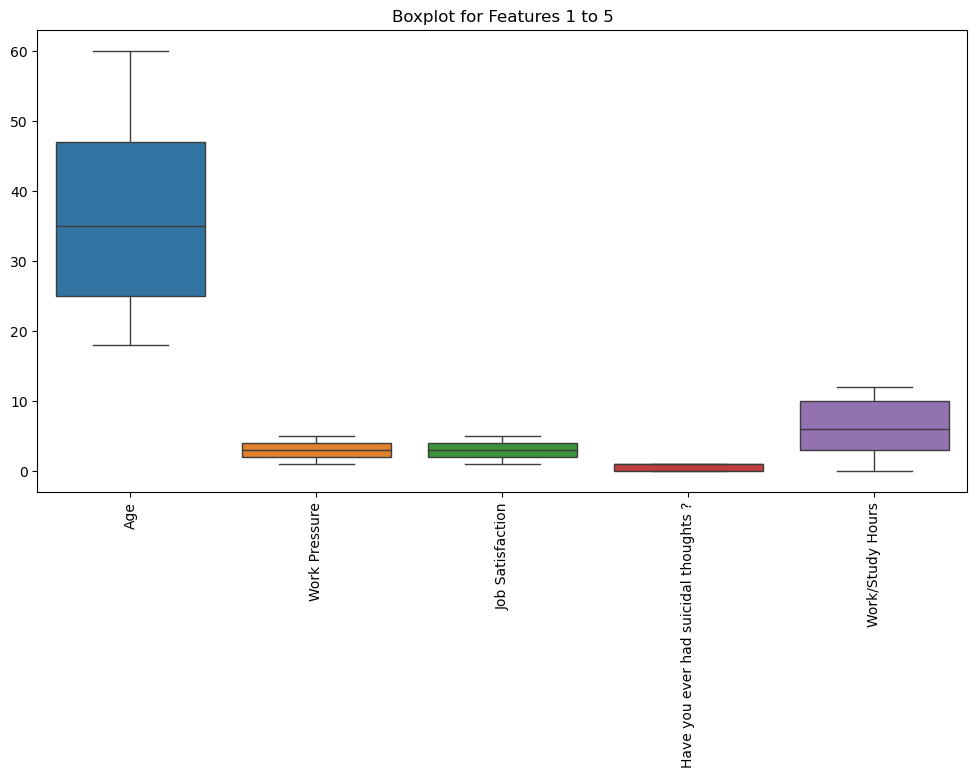

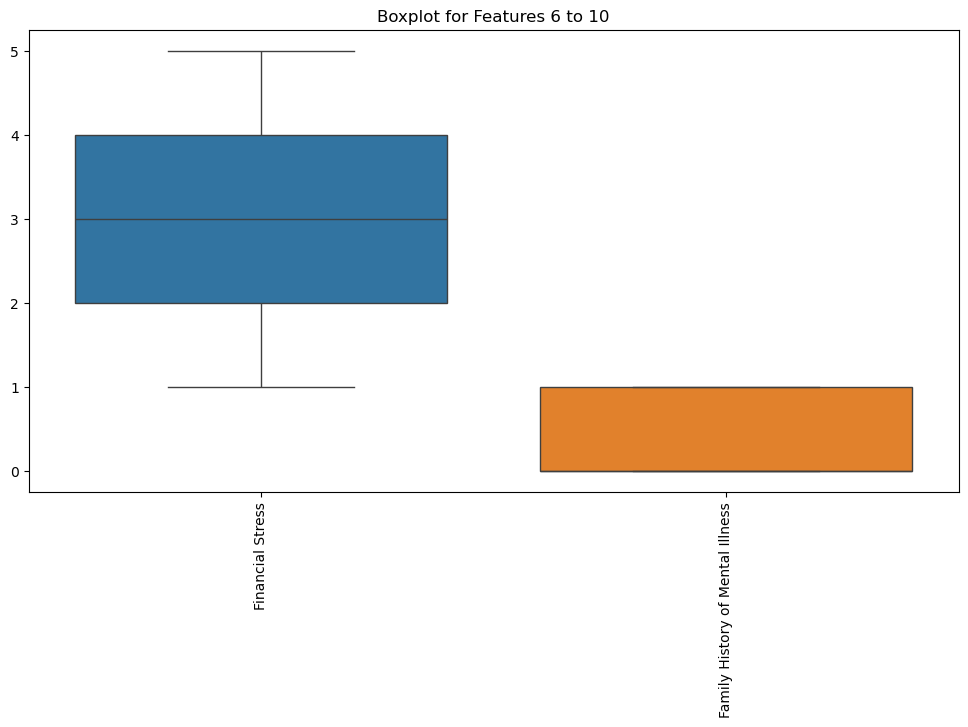

In [28]:
# Select numerical columns only
num_cols = X_resampled.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots in chunks
chunk_size = 5  # Number of features per plot
for i in range(0, len(num_cols), chunk_size):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=X_resampled[num_cols[i:i + chunk_size]])
    plt.xticks(rotation=90)
    plt.title(f"Boxplot for Features {i+1} to {i+chunk_size}")
    plt.show()

In [29]:
# Compute the correlation matrix
corr_matrix = X_resampled.corr()


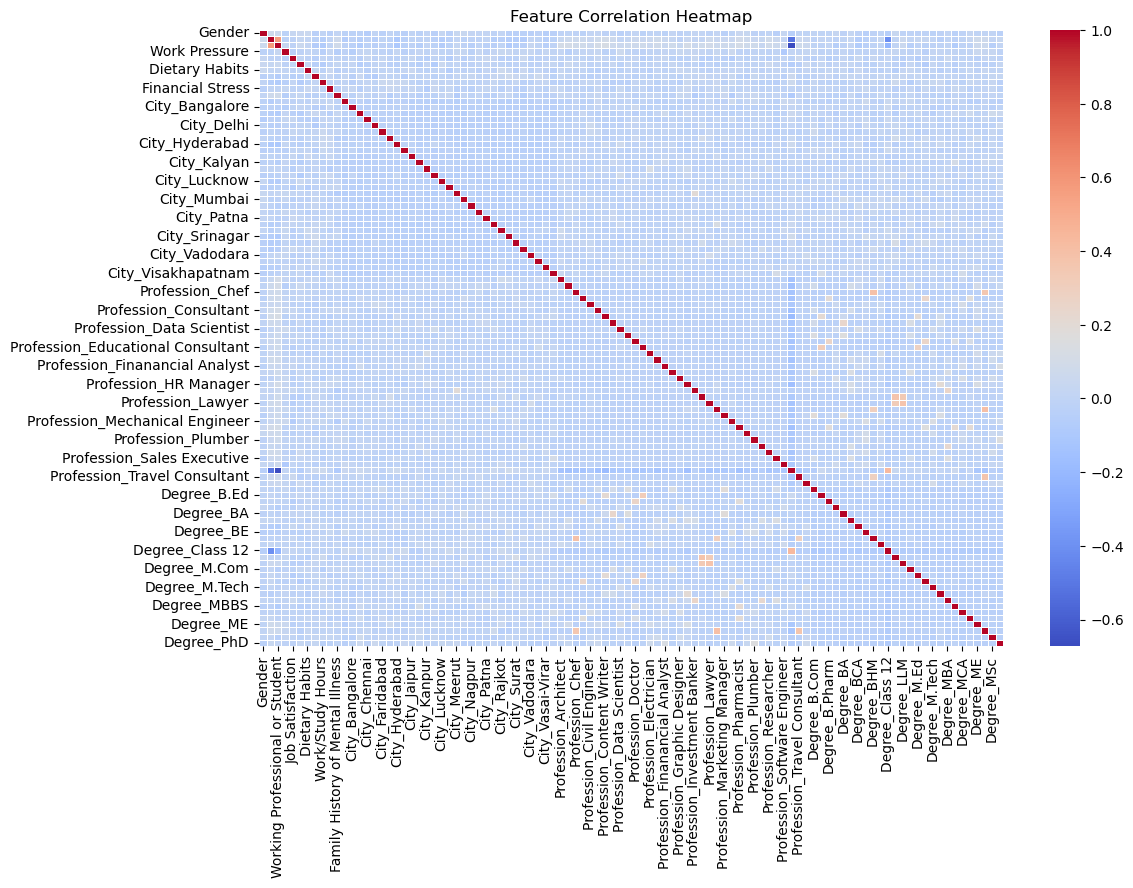

In [30]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=[np.number]):  # Select numerical features only
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    
    return outlier_counts

In [32]:
# Detect outliers
outliers_iqr = detect_outliers_iqr(X_resampled)
print("Outlier counts per feature (IQR method):")
print(outliers_iqr)

Outlier counts per feature (IQR method):
{'Gender': 0, 'Age': 0, 'Working Professional or Student': 0, 'Work Pressure': 0, 'Job Satisfaction': 0, 'Sleep Duration': 0, 'Dietary Habits': 0, 'Have you ever had suicidal thoughts ?': 0, 'Work/Study Hours': 0, 'Financial Stress': 0, 'Family History of Mental Illness': 0}


In [35]:
# Drop 'Name' and 'City' (if still present)
X_resampled = X_resampled.drop(columns=['Name'], errors='ignore')

In [37]:
# Check the remaining features
print("Remaining Features:", X_resampled.columns)

Remaining Features: Index(['Gender', 'Age', 'Working Professional or Student', 'Work Pressure',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal', 'City_Chennai',
       'City_Delhi', 'City_Faridabad', 'City_Ghaziabad', 'City_Hyderabad',
       'City_Indore', 'City_Jaipur', 'City_Kalyan', 'City_Kanpur',
       'City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_Meerut',
       'City_Mumbai', 'City_Nagpur', 'City_Nashik', 'City_Patna', 'City_Pune',
       'City_Rajkot', 'City_Srinagar', 'City_Surat', 'City_Thane',
       'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Profession_Architect',
       'Profession_Business Analyst', 'Profession_Chef', 'Profession_Chemist',
       'Profession_Civil Engineer', 'Profession_Consultant',
       'Profession_Cont

In [38]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
num_features = ['Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 
                'Work/Study Hours', 'Financial Stress']

In [39]:
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [40]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [41]:
# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

In [42]:
# Display top features
print(feature_importances.head(10))

Age                                      0.217264
Have you ever had suicidal thoughts ?    0.087441
Work/Study Hours                         0.070600
Working Professional or Student          0.059998
Financial Stress                         0.056245
Work Pressure                            0.048240
Job Satisfaction                         0.042561
Profession_Teacher                       0.033936
Sleep Duration                           0.032164
Dietary Habits                           0.030067
dtype: float64


In [43]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [46]:
# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

In [47]:
# Evaluate model performance
log_reg_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}

In [48]:
log_reg_results

{'Accuracy': 0.921875,
 'Precision': 0.7741935483870968,
 'Recall': 0.7912087912087912,
 'F1 Score': 0.782608695652174}

In [49]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [52]:
# Evaluate the model
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

In [54]:
rf_metrics

{'Accuracy': 0.908203125,
 'Precision': 0.8235294117647058,
 'Recall': 0.6153846153846154,
 'F1 Score': 0.7044025157232704}

In [56]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.6/124.9 MB 4.0 MB/s eta 0:00:31
   - -------------------------------------- 3.4/124.9 MB 5.4 MB/s eta 0:00:23
   - -------------------------------------- 5.0/124.9 MB 6.0 MB/s eta 0:00:20
   -- ------------------------------------- 6.6/124.9 MB 6.6 MB/s eta 0:00:18
   -- ------------------------------------- 8.7/124.9 MB 7.1 MB/s eta 0:00:17
   --- ------------------------------------ 10.2/124.9 MB 7.1 MB/s eta 0:00:17
   --- ------------------------------------ 11.8/124.9 MB 7.2 MB/s eta 0:00:16
   ---- ----------------------------------- 13.4/124.9 MB 7.2 MB/s eta 0:00:16
   ---- ----------------------------------- 14.2/124.9 MB 6.9 MB/s eta 0:00:16
   ----- ---------------------------------- 15.7/124.9 MB 6.9 MB/s eta 0:00:16
   ----- ---------------------------------- 17.3/124.9 MB 7.0 MB/s

In [57]:
from xgboost import XGBClassifier
# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

c:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [58]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)


In [59]:
# Evaluate performance
xgb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb)
}

In [60]:
xgb_metrics

{'Accuracy': 0.919921875,
 'Precision': 0.7906976744186046,
 'Recall': 0.7472527472527473,
 'F1 Score': 0.768361581920904}

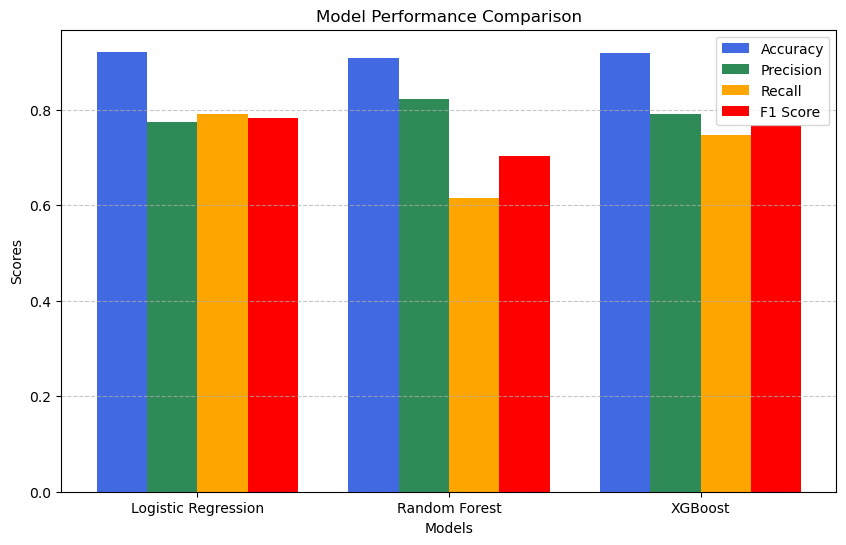

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "Random Forest", "XGBoost"]

# Performance metrics
accuracy = [0.9219, 0.9082, 0.9199]
precision = [0.7742, 0.8235, 0.7907]
recall = [0.7912, 0.6154, 0.7473]
f1_score = [0.7826, 0.7044, 0.7684]

# Bar width and positions
x = np.arange(len(models))
width = 0.2

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width*1.5, accuracy, width, label="Accuracy", color='royalblue')
ax.bar(x - width/2, precision, width, label="Precision", color='seagreen')
ax.bar(x + width/2, recall, width, label="Recall", color='orange')
ax.bar(x + width*1.5, f1_score, width, label="F1 Score", color='red')

# Labels and formatting
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 (Lasso), L2 (Ridge)
    'solver': ['liblinear']  # 'liblinear' supports L1 & L2 penalties
}

In [66]:
# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

In [67]:
# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [68]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [69]:
# Train the best model
best_log_reg = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42)
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [70]:
# Predictions
y_pred = best_log_reg.predict(X_test)

In [72]:
from sklearn import metrics

optimized_metrics = {
    "Accuracy": metrics.accuracy_score(y_test, y_pred),
    "Precision": metrics.precision_score(y_test, y_pred),
    "Recall": metrics.recall_score(y_test, y_pred),
    "F1 Score": metrics.f1_score(y_test, y_pred)  # Avoids conflict
}

In [73]:
optimized_metrics

{'Accuracy': 0.931640625,
 'Precision': 0.8255813953488372,
 'Recall': 0.7802197802197802,
 'F1 Score': 0.8022598870056498}

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions for both train & test sets
y_train_pred = best_log_reg.predict(X_train)  # Predictions on train data
y_test_pred = best_log_reg.predict(X_test)    # Predictions on test data

In [77]:
# Calculate metrics for Train set
train_metrics = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred)
}

In [78]:
# Calculate metrics for Test set
test_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

In [80]:
train_metrics

{'Accuracy': 0.9461839530332681,
 'Precision': 0.8670520231213873,
 'Recall': 0.8241758241758241,
 'F1 Score': 0.8450704225352113}

In [81]:
test_metrics

{'Accuracy': 0.931640625,
 'Precision': 0.8255813953488372,
 'Recall': 0.7802197802197802,
 'F1 Score': 0.8022598870056498}

In [ ]:
import joblib
# Saving the best model
joblib.dump(best_log_reg, "depression_model.pkl")
# Saving scaler since inputs need to be standardized
joblib.dump(scaler, 'scaler.pkl')